## <font color = green> Classification Model - Built a model that classifies the side effects of a drug.

### <font color = blue>  Import the necessary Libraries & Load the dataset into python environment : 

In [1]:
from faker import Faker #Faker is a Python library that allows to generate fake data 
from random import choice, sample #for making random selections 

In [2]:
import numpy as np
import pandas as pd

# Plotting the data:
import matplotlib.pyplot as plt
import seaborn as sns 

# Preprocessing the dataset:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Split the dataset into training and testing sets:
from sklearn.model_selection import train_test_split

# Classification algorithms:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Analysis of classificaiton algorithms:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Model Selection
from sklearn.model_selection import GridSearchCV

# Remove warnings:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'C:\Users\sajee\Downloads\AATHIRA DSA\INTERNSHIP\webmd.csv') 

### <font color = blue> Perform Data Understanding:

In [4]:
# View first 10 rows of data

data.head(10)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
5,55-64,Other,7/19/2008,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,,0
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
8,25-34,Acne,4/27/2016,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1
9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0


In [5]:
# Dimension of dataset

data.shape

(362806, 12)

In [6]:
# Information about the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


### <font color = blue>  Create Name and Race columns :

In [7]:
fake = Faker()

# Generate fake names and races
data['Name'] = [fake.name() for _ in range(len(data))]
data['Race'] = [fake.random_element(elements=('White', 'Black', 'Asian', 'Hispanic')) for _ in range(len(data))]

In [8]:
# Rename the column
data = data.rename(columns={'Sides':'SideEffects'})

# Set the columns 'Name' and 'Race' as the first and second level
data = data.set_index(['Name', 'Race'])

# Reset the index to move 'Name' and 'Race' back to columns
data = data.reset_index()

In [9]:
data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,SideEffects,UsefulCount
0,Blake Singh,Asian,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Julie Garcia,White,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Seth Harris,White,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Kevin White,Black,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Phillip Anderson MD,Black,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [10]:
data.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex',
       'SideEffects', 'UsefulCount'],
      dtype='object')

In [11]:
# Dimension of dataset

data.shape

(362806, 14)

In [12]:
# Information about the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Race           362806 non-null  object
 2   Age            362806 non-null  object
 3   Condition      362806 non-null  object
 4   Date           362806 non-null  object
 5   Drug           362806 non-null  object
 6   DrugId         362806 non-null  int64 
 7   EaseofUse      362806 non-null  int64 
 8   Effectiveness  362806 non-null  int64 
 9   Reviews        362769 non-null  object
 10  Satisfaction   362806 non-null  int64 
 11  Sex            362806 non-null  object
 12  SideEffects    362806 non-null  object
 13  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


In [13]:
# Summarize the data by generating descriptive statistics of numerical columns

data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [14]:
data.describe(include = object).transpose()

,count,unique,top,freq
Name,362806,181513,Michael Smith,184
Race,362806,4,White,91082
Age,362806,12,45-54,80043
Condition,362806,1806,Other,49765
Date,362806,4524,10/29/2007,404
Drug,362806,7093,cymbalta,4648
Reviews,362769,250167,,41824
Sex,362806,3,Female,238226
SideEffects,362806,1651,,17460


### <font color = blue> Feature Description: 

In [15]:
# Number of numerical columns & Number of categorical columns in the DataFrame

numerical_columns = data.select_dtypes(include=['float', 'int']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print(f"Number of Numerical Columns: {len(numerical_columns)}")
print(f"Number of Categorical Columns: {len(categorical_columns)}")

Number of Numerical Columns: 5
Number of Categorical Columns: 9


1. Name (categorical): Name of patient
2. Race (categorical): Race of patient
3. Age (numerical): Age group range of patient
4. Condition (categorical): Condition/Symptom from which the patient is suffering
5. Date (temporal): Date of usage
6. Drug (categorical): Name of the drug
7. DrugId (numerical): Identity/code of the drug
8. EaseOfUse (numerical):  Patient's 5-Star rating on the ease of use of drug 
9. Effectiveness (numerical):Patient's 5-Star rating on the effectiveness of drug
10. Review (text): Patient's review
11. Satisfaction (numerical):  Patient's 5-Star rating on satisfaction
12. Sex (categorical): Gender of the patient
13. SideEffects (text): Side effects associated with drug (if any)
14. UsefulCount (numerical): Number of users who found review useful

## <font color = blue>  Exploratory Data Analysis:

### Unique values: 

In [16]:
# Iterate over the columns

for column in data.columns:
    # Get the unique values for the column
    unique_values = data[column].unique()
    
    # Print the column name and its unique values
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-----------------------")

Column: Name
Unique Values: ['Blake Singh' 'Julie Garcia' 'Seth Harris' ... 'Shawn Padilla'
 'Randall Nguyen' 'Mr. Joshua Simpson']
-----------------------
Column: Race
Unique Values: ['Asian' 'White' 'Black' 'Hispanic']
-----------------------
Column: Age
Unique Values: ['75 or over' '25-34' '65-74' '35-44' '55-64' '45-54' '19-24' ' ' '13-18'
 '7-12' '0-2' '3-6']
-----------------------
Column: Condition
Unique Values: ['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance']
-----------------------
Column: Date
Unique Values: ['9/21/2014' '1/13/2011' '7/16/2012' ... '10/25/2019' '6/22/2019'
 '10/19/2019']
-----------------------
Column: Drug
Unique Values: ['25dph-7.5peh' 'warfarin (bulk) 100 % powder' 'wymzya fe' ...
 'chest congestion relief dm' 'chantix' 'chateal']
-----------------------
Column: DrugId
Unique Values: [146724 144731 163180 ...  94947 144470 163265]
-----------------------
Column: 

### Counts of unique values:

In [17]:
print('Name',data['Name'].nunique())
print('Race',data['Race'].nunique())
print('Age',data['Age'].nunique())
print('Condition',data['Condition'].nunique())
print('Date',data['Date'].nunique())
print('Drug',data['Drug'].nunique())
print('DrugId',data['DrugId'].nunique())
print('EaseofUse',data['EaseofUse'].nunique())
print('Effectiveness',data['Effectiveness'].nunique())
print('Reviews',data['Reviews'].nunique())
print('Satisfaction',data['Satisfaction'].nunique())
print('Sex',data['Sex'].nunique())
print('SideEffects',data['SideEffects'].nunique())
print('UsefulCount',data['UsefulCount'].nunique())

Name 181513
Race 4
Age 12
Condition 1806
Date 4524
Drug 7093
DrugId 6572
EaseofUse 7
Effectiveness 7
Reviews 250167
Satisfaction 7
Sex 3
SideEffects 1651
UsefulCount 148


In [18]:
#creating a copy
df = data.copy()

In [19]:
# Define custom order for 'Age'
age_order = ['0-2', '3-6', '7-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75 or over']

# Group by 'Age' and find the most common drug in each age group
most_used_drug_by_age = df.groupby('Age')['Drug'].agg(lambda x: x.value_counts().idxmax()).reindex(age_order)

print(most_used_drug_by_age)

Age
0-2                             cefdinir
3-6                              vyvanse
7-12                             vyvanse
13-18                            lexapro
19-24         mirena intrauterine device
25-34                            lexapro
35-44                           cymbalta
45-54                           cymbalta
55-64                lisinopril solution
65-74                lisinopril solution
75 or over           lisinopril solution
Name: Drug, dtype: object


### Visualization: 

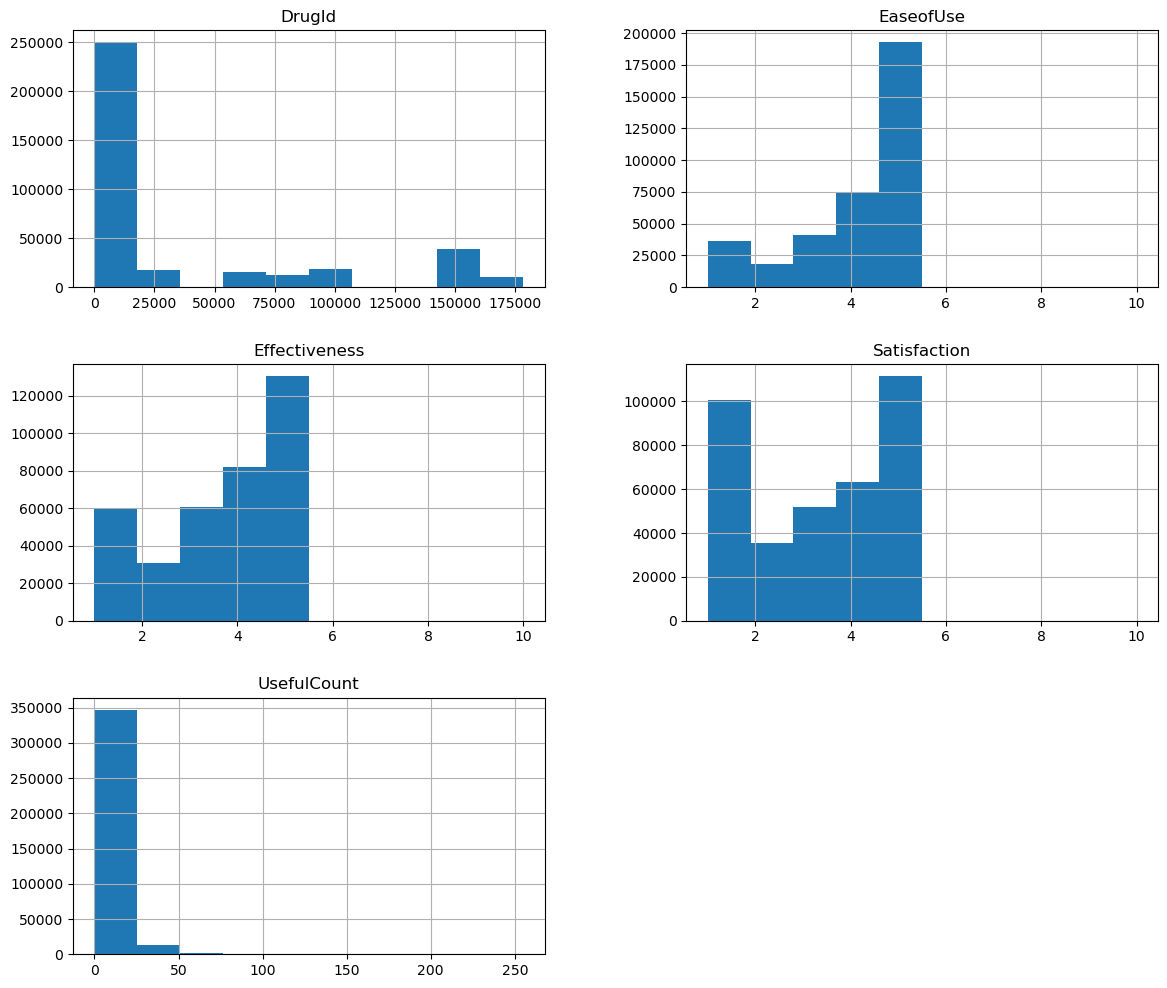

In [20]:
# Frequency Distribution of Numeric Columns:

freqgraph = data.select_dtypes(include=['float' , 'int'])
freqgraph.hist(figsize=(14,12))
plt.show()

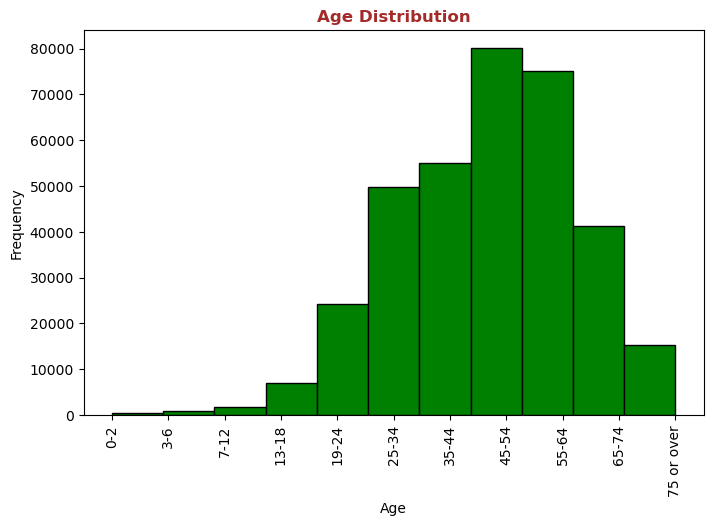

In [21]:
# Define the desired order of age categories
age_order = ['0-2', '3-6', '7-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75 or over']

# Convert 'Age' column to categorical with desired order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Map age categories to numeric values
age_numeric = df['Age'].map({category: i for i, category in enumerate(age_order)})

plt.figure(figsize=(8, 5))

# Create histogram
plt.hist(age_numeric, bins=len(age_order), color='green',edgecolor='black')

# Set x-axis tick labels
plt.xticks(range(len(age_order)), age_order,rotation=90)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution',color='brown', fontweight='bold')

# Show the plot
plt.show() 

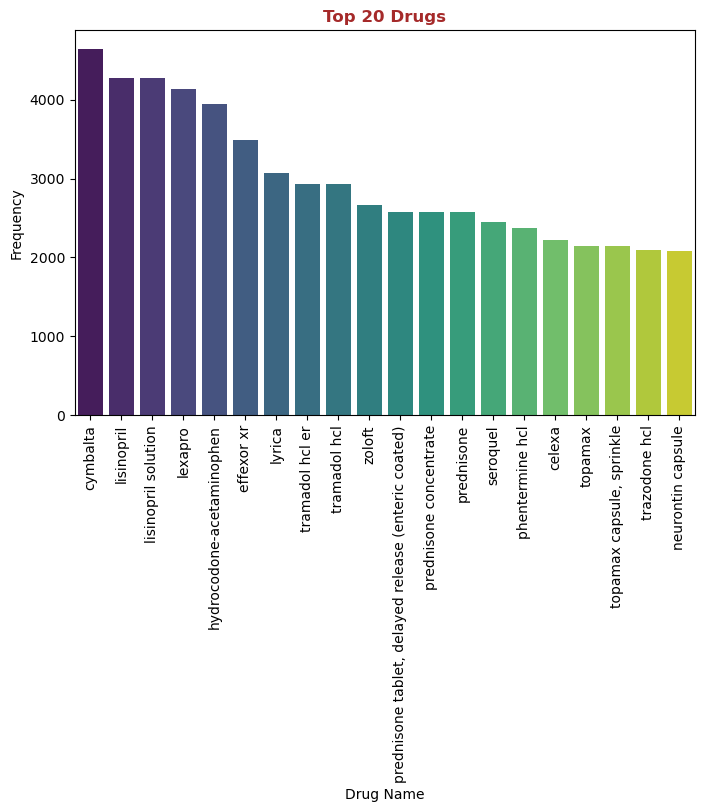

In [22]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=data['Drug'].value_counts().head(20).index, y=data['Drug'].value_counts().head(20), palette='viridis')

# Add title and labels
plt.title('Top 20 Drugs',color='brown', fontweight='bold')
plt.xlabel('Drug Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Show the plot
plt.show()

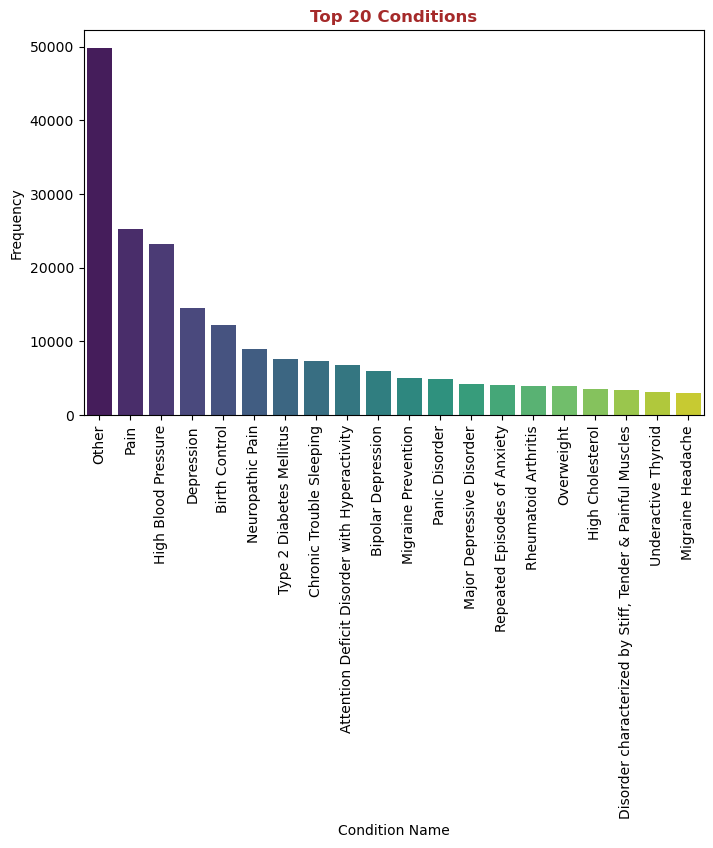

In [23]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=data['Condition'].value_counts().head(20).index, 
            y=data['Condition'].value_counts().head(20).values, 
            palette='viridis')

# Add title and labels
plt.title('Top 20 Conditions',color='brown', fontweight='bold')
plt.xlabel('Condition Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90) 

# Show the plot
plt.show()

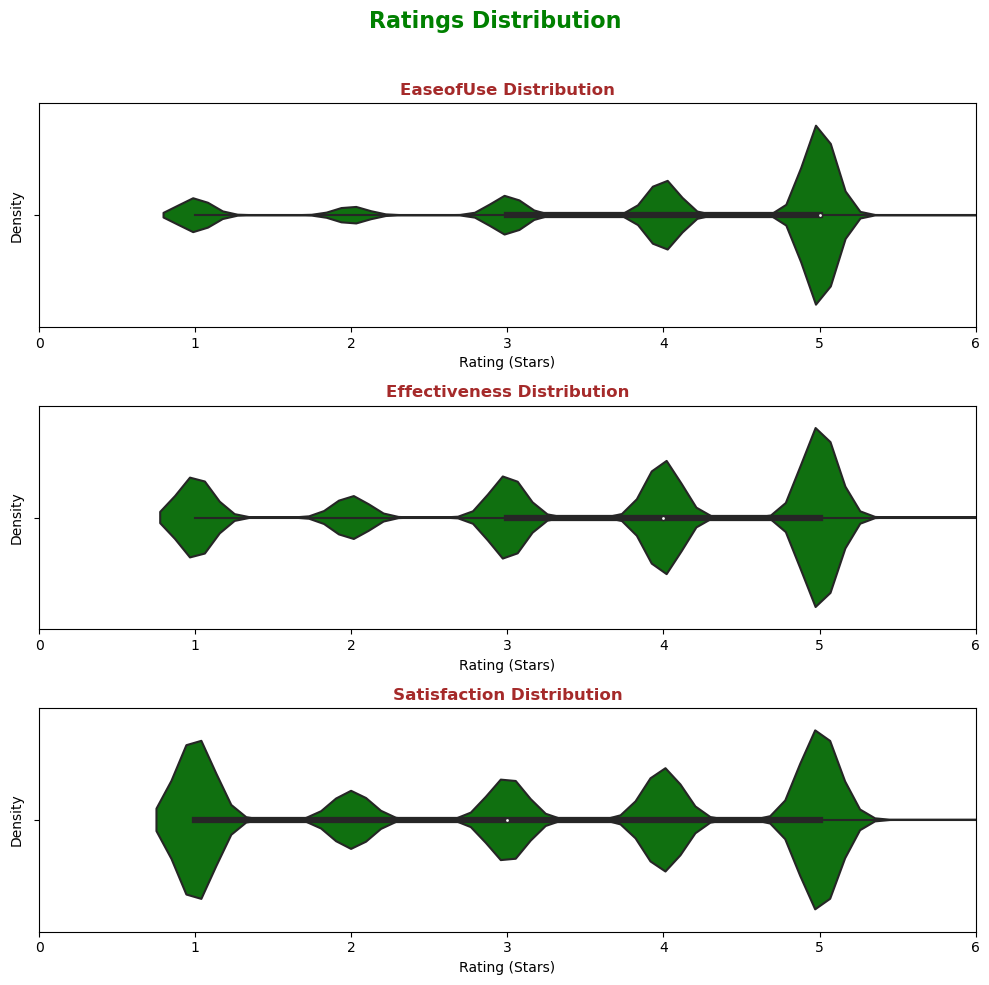

In [24]:
ratings = [1, 2, 3, 4, 5, 6, 10]

# Create subplots without a shared x-axis
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Create violin plots for 'Ease of Use', 'Effectiveness', and 'Satisfaction'
for ax, column_name in zip(axs, ['EaseofUse', 'Effectiveness', 'Satisfaction']):
    sns.violinplot(x=data[column_name], ax=ax, color='green')
    ax.set_ylabel('Density')
    ax.set_title(f'{column_name} Distribution',color='brown', fontweight='bold')
    
    # Set individual x-axis limits
    ax.set_xlim(0, 6)

    # Set individual x-axis labels
    ax.set_xlabel('Rating (Stars)')

# Set the main title
plt.suptitle('Ratings Distribution', fontsize=16, color='green', fontweight='bold')

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show() 

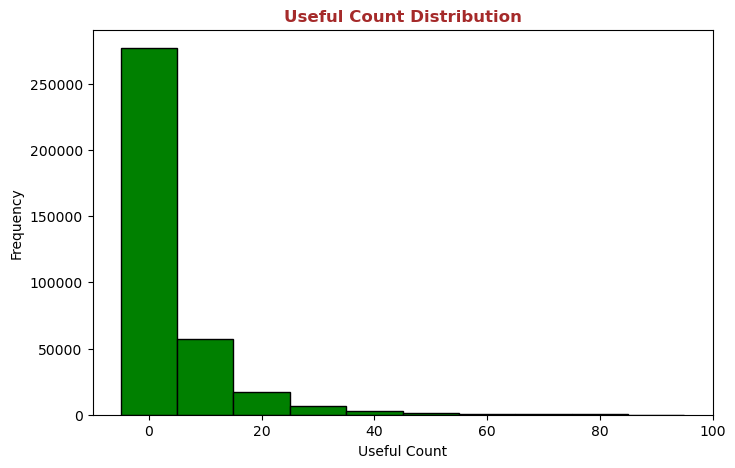

In [25]:
bin_edges = np.arange(0, 101, 10)

# Count the number of counts falling into each bin
bin_counts, _ = np.histogram(data['UsefulCount'], bins=bin_edges)
plt.figure(figsize=(8, 5))

# Create bar plot
plt.bar(bin_edges[:-1], bin_counts, width=10, color='green', edgecolor='black')

# Add title and labels
plt.title('Useful Count Distribution',color='brown', fontweight='bold')
plt.xlabel('Useful Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

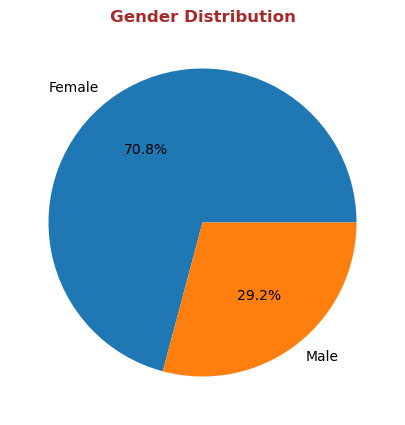

In [26]:
# Filter out the empty string from 'Sex'
gender_counts = df[df['Sex'].isin(['Male', 'Female'])]['Sex'].value_counts()
plt.figure(figsize=(8,5))

# Create pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Set title
plt.title('Gender Distribution',color='brown', fontweight='bold')
plt.show()

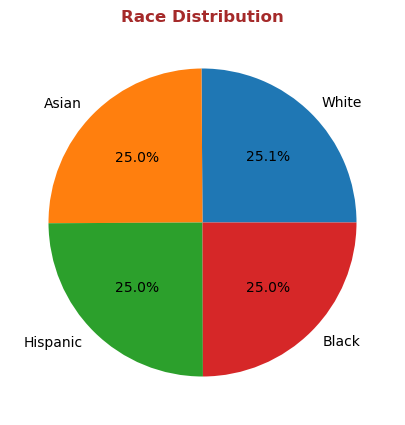

In [27]:
race_counts = data['Race'].value_counts()

plt.figure(figsize=(8, 5))

# Create pie chart
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%')

# Set title
plt.title('Race Distribution',color='brown', fontweight='bold')

# Show the pie chart
plt.show()

#### Satisfaction levels of top 10 drugs:

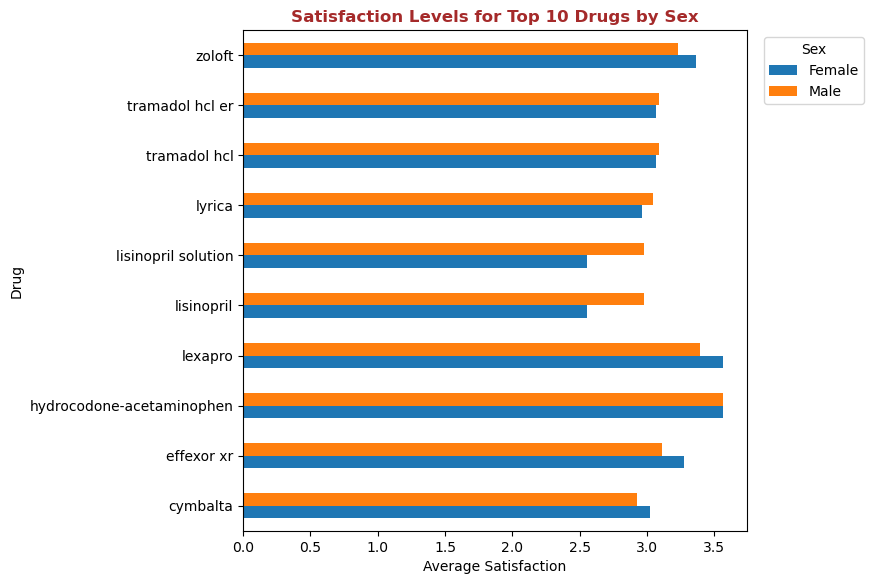

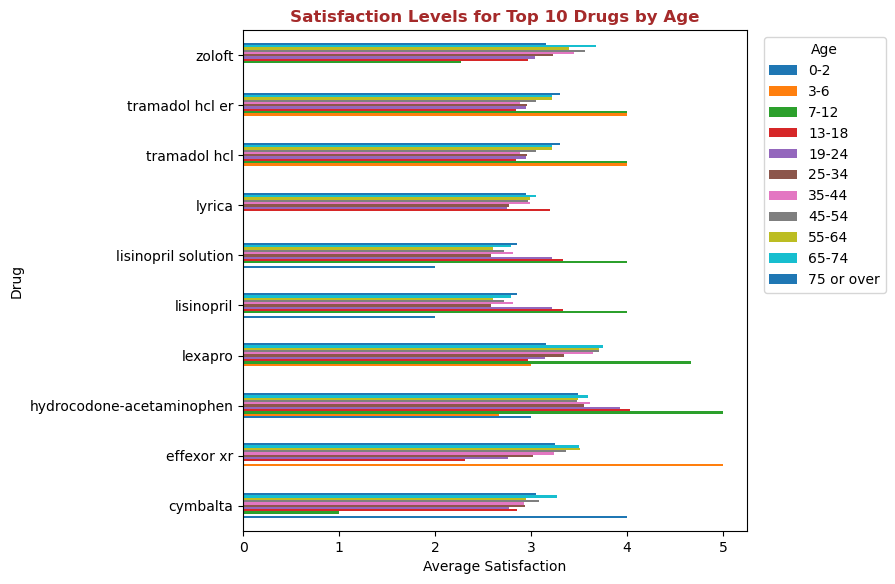

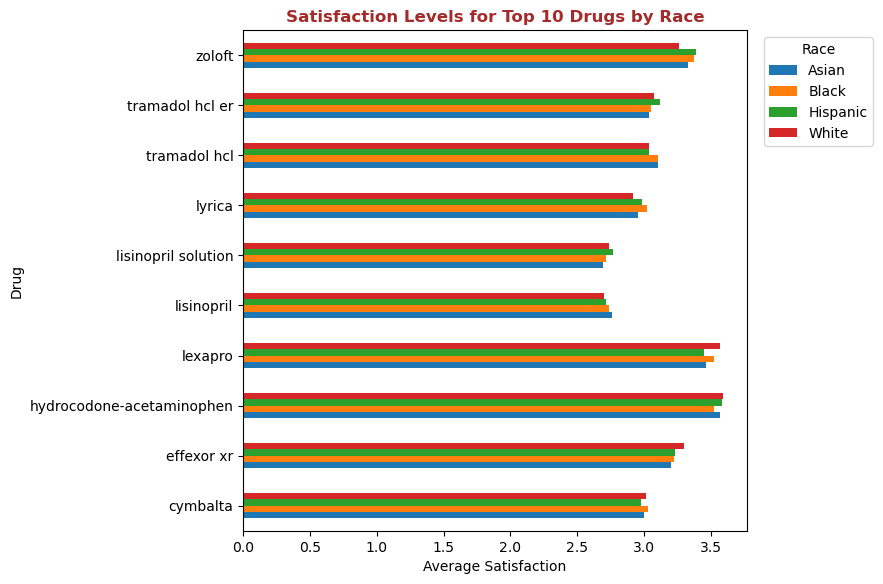

In [28]:
# Define custom order for 'Sex'
sex_order = ['Female', 'Male']

# Define custom order for 'Age'
age_order = ['0-2', '3-6', '7-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75 or over']

# Convert 'Age' column to categorical with desired order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Map age categories to numeric values
age_numeric = df['Age'].cat.codes

# Calculate the frequency of each drug
drug_frequency = df['Drug'].value_counts()

# Select the top 10 drugs based on frequency
top_10_drugs = drug_frequency.head(10).index

# Filter the dfFrame to include only the top 10 drugs
filtered_df = df[df['Drug'].isin(top_10_drugs)]

# Define the parameters for plotting
parameters = [('Sex', 'Satisfaction', 'Satisfaction Levels for Top 10 Drugs by Sex', 'Sex', sex_order),
              ('Age', 'Satisfaction', 'Satisfaction Levels for Top 10 Drugs by Age', 'Age', age_order),
             ('Race', 'Satisfaction', 'Satisfaction Levels for Top 10 Drugs by Race', 'Race',None)]

# Iterate over the parameters and generate the plots
for param, ylabel, title, legend_title, custom_order in parameters:
    # Group the filtered df by 'Drug' and the current parameter, and calculate the average satisfaction
    grouped_df = filtered_df.groupby(['Drug', param])['Satisfaction'].mean().unstack()

    # Arrange the df based on custom order
    grouped_df = grouped_df.reindex(columns=custom_order)

    # Plot the grouped horizontal bar plot
    grouped_df.plot(kind='barh', figsize=(6.5,6.5))

    # Set the title and labels
    plt.title(title,color='brown', fontweight='bold')
    plt.xlabel('Average Satisfaction')
    plt.ylabel('Drug')

    # Add a legend
    plt.legend(title=legend_title, loc='upper left', bbox_to_anchor=(1.02, 1))

    # Show the plot
    plt.show()

#### Effectiveness levels of top 10 drugs:

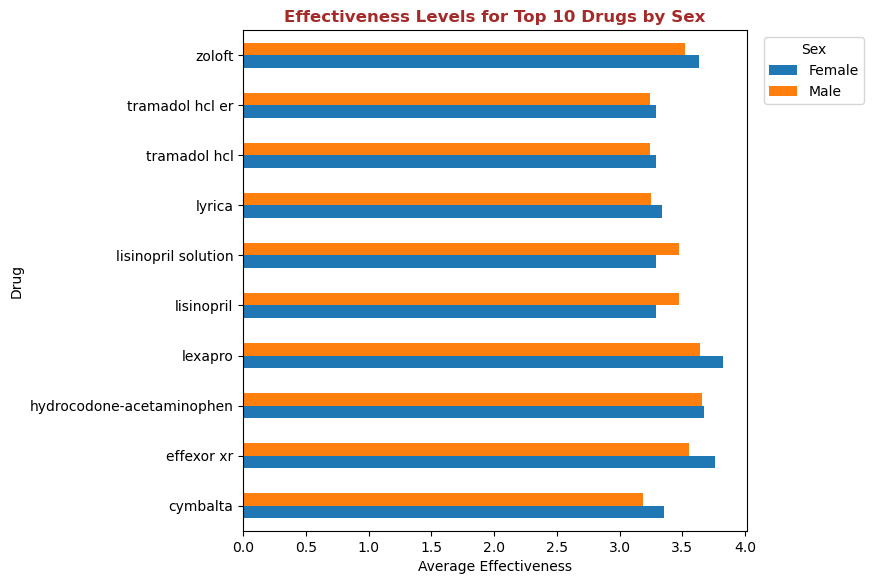

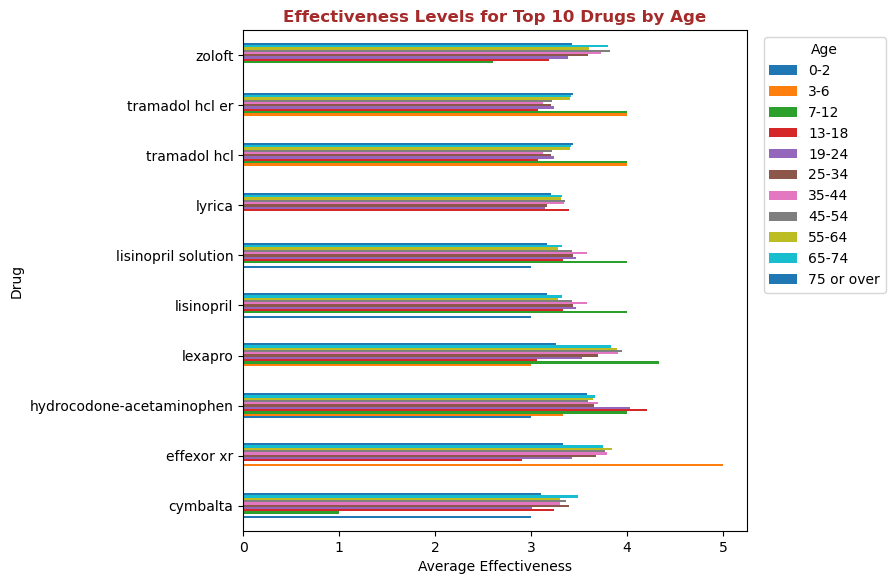

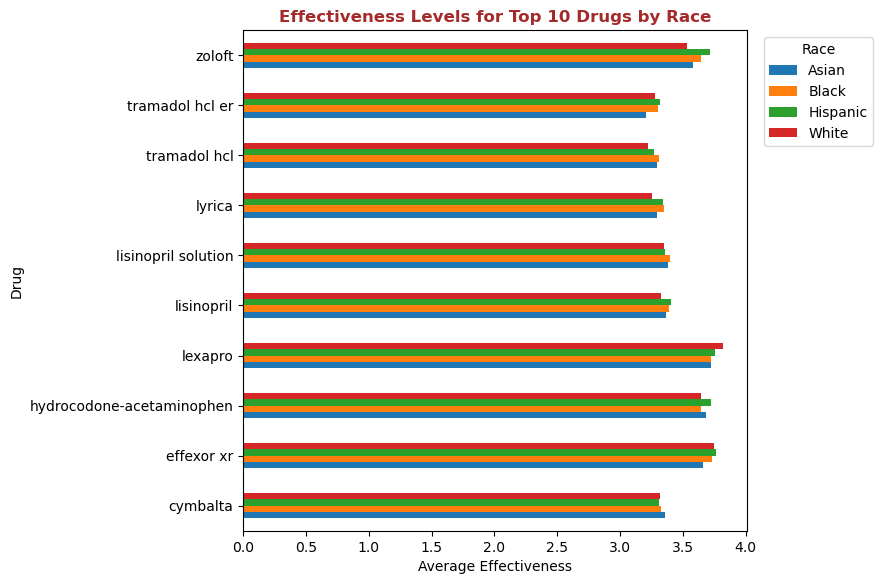

In [29]:
# Define custom order for 'Sex'
sex_order = ['Female', 'Male']

# Define custom order for 'Age'
age_order = ['0-2', '3-6', '7-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75 or over']

# Convert 'Age' column to categorical with desired order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Map age categories to numeric values
age_numeric = df['Age'].cat.codes

# Calculate the frequency of each drug
drug_frequency = df['Drug'].value_counts()

# Select the top 10 drugs based on frequency
top_10_drugs = drug_frequency.head(10).index

# Filter the dfFrame to include only the top 10 drugs
filtered_df = df[df['Drug'].isin(top_10_drugs)]

# Define the parameters for plotting
parameters = [('Sex', 'Effectiveness', 'Effectiveness Levels for Top 10 Drugs by Sex', 'Sex', sex_order),
              ('Age', 'Effectiveness', 'Effectiveness Levels for Top 10 Drugs by Age', 'Age', age_order),
              ('Race', 'Effectiveness', 'Effectiveness Levels for Top 10 Drugs by Race', 'Race', None)]

# Iterate over the parameters and generate the plots
for param, ylabel, title, legend_title, custom_order in parameters:
    # Group the filtered df by 'Drug' and the current parameter, and calculate the average Effectiveness
    grouped_df = filtered_df.groupby(['Drug', param])['Effectiveness'].mean().unstack()

    # If there is a custom order, arrange the df based on it
    if custom_order is not None:
        grouped_df = grouped_df.reindex(columns=custom_order)

    # Plot the grouped horizontal bar plot
    grouped_df.plot(kind='barh', figsize=(6.5, 6.5))

    # Set the title and labels
    plt.title(title,color='brown', fontweight='bold')
    plt.xlabel('Average Effectiveness')
    plt.ylabel('Drug')

    # Add a legend
    plt.legend(title=legend_title, loc='upper left', bbox_to_anchor=(1.02, 1))

    # Show the plot
    plt.show()


#### Ease of use of top 10 drugs:

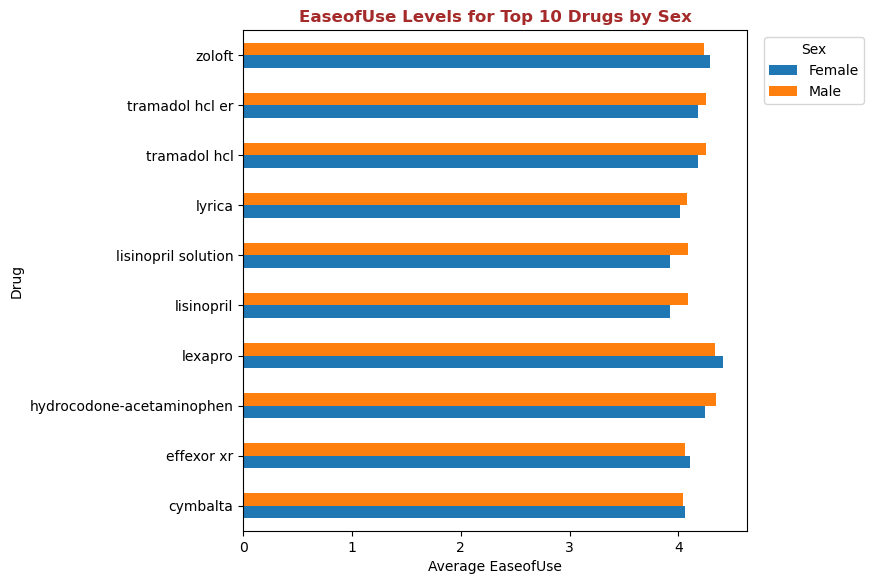

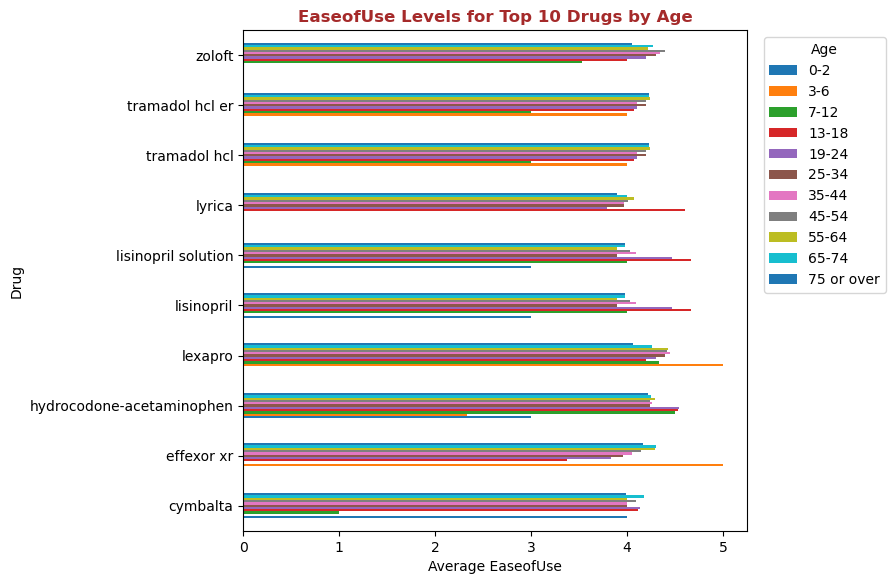

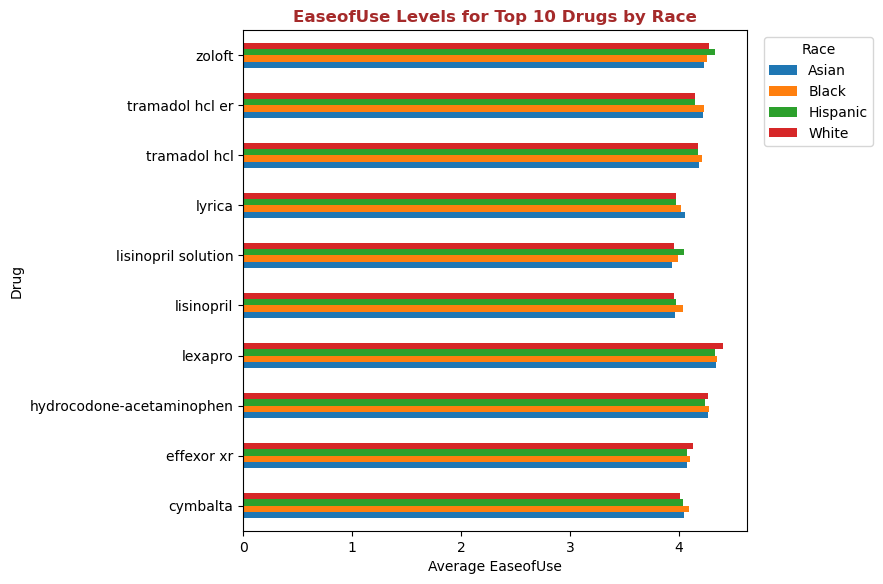

In [30]:
# Define custom order for 'Sex'
sex_order = ['Female', 'Male']

# Define custom order for 'Age'
age_order = ['0-2', '3-6', '7-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75 or over']

# Convert 'Age' column to categorical with desired order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Map age categories to numeric values
age_numeric = df['Age'].cat.codes

# Calculate the frequency of each drug
drug_frequency = df['Drug'].value_counts()

# Select the top 10 drugs based on frequency
top_10_drugs = drug_frequency.head(10).index

# Filter the dfFrame to include only the top 10 drugs
filtered_df = df[df['Drug'].isin(top_10_drugs)]

# Define the parameters for plotting
parameters = [('Sex', 'EaseofUse', 'EaseofUse Levels for Top 10 Drugs by Sex', 'Sex', sex_order),
              ('Age', 'EaseofUse', 'EaseofUse Levels for Top 10 Drugs by Age', 'Age', age_order),
              ('Race', 'EaseofUse', 'EaseofUse Levels for Top 10 Drugs by Race', 'Race', None)]

# Iterate over the parameters and generate the plots
for param, ylabel, title, legend_title, custom_order in parameters:
    # Group the filtered df by 'Drug' and the current parameter, and calculate the average EaseofUse
    grouped_df = filtered_df.groupby(['Drug', param])['EaseofUse'].mean().unstack()

    # If there is a custom order, arrange the df based on it
    if custom_order is not None:
        grouped_df = grouped_df.reindex(columns=custom_order)

    # Plot the grouped horizontal bar plot
    grouped_df.plot(kind='barh', figsize=(6.5, 6.5))

    # Set the title and labels
    plt.title(title,color='brown', fontweight='bold')
    plt.xlabel('Average EaseofUse')
    plt.ylabel('Drug')

    # Add a legend
    plt.legend(title=legend_title, loc='upper left', bbox_to_anchor=(1.02, 1))

    # Show the plot
    plt.show()


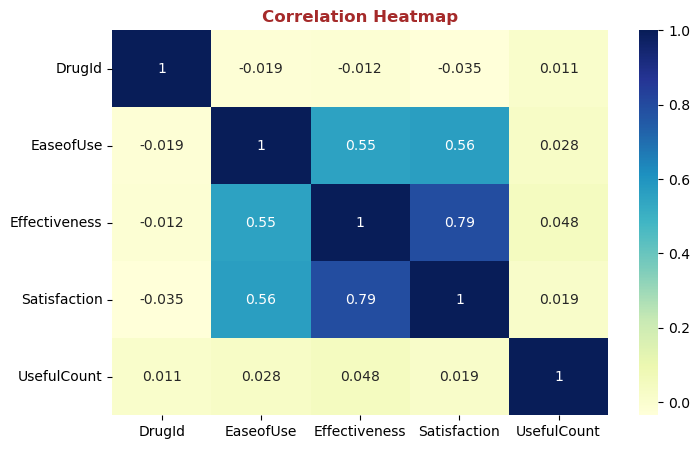

In [31]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

plt.title("Correlation Heatmap",color='brown', fontweight='bold')
plt.show()

## <font color = blue>Data Preprocessing:

### <font color = blue>Data Cleaning:

###  Missing Value Handling:

In [32]:
# Check for missing values:

data.isna().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
SideEffects       0
UsefulCount       0
dtype: int64

In [33]:
# Filling the missing values in the "Reviews" column of the dataset with the mode value of the column:

for col in ['Reviews']:
    data[col]=data[col].fillna(data[col].mode()[0])

In [34]:
# Check for missing values:

data.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
SideEffects      0
UsefulCount      0
dtype: int64

### Handle 'Age'  , 'Condition' ,  'Sex' Columns: 

In [35]:
columns_to_fill = ['Age' ,'Condition','Sex']

for column in columns_to_fill:
    mode_value = data[column].mode()[0]  # Get the mode for the column
    data[column] = data[column].replace(' ', mode_value)

In [36]:
# List of columns to find unique values
columns_to_find_unique = ['Age' ,'Condition','Sex']

for column in columns_to_find_unique:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-----------------------")

Column: Age
Unique Values: ['75 or over' '25-34' '65-74' '35-44' '55-64' '45-54' '19-24' '13-18'
 '7-12' '0-2' '3-6']
-----------------------
Column: Condition
Unique Values: ['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance']
-----------------------
Column: Sex
Unique Values: ['Male' 'Female']
-----------------------


### Outlier Handling:

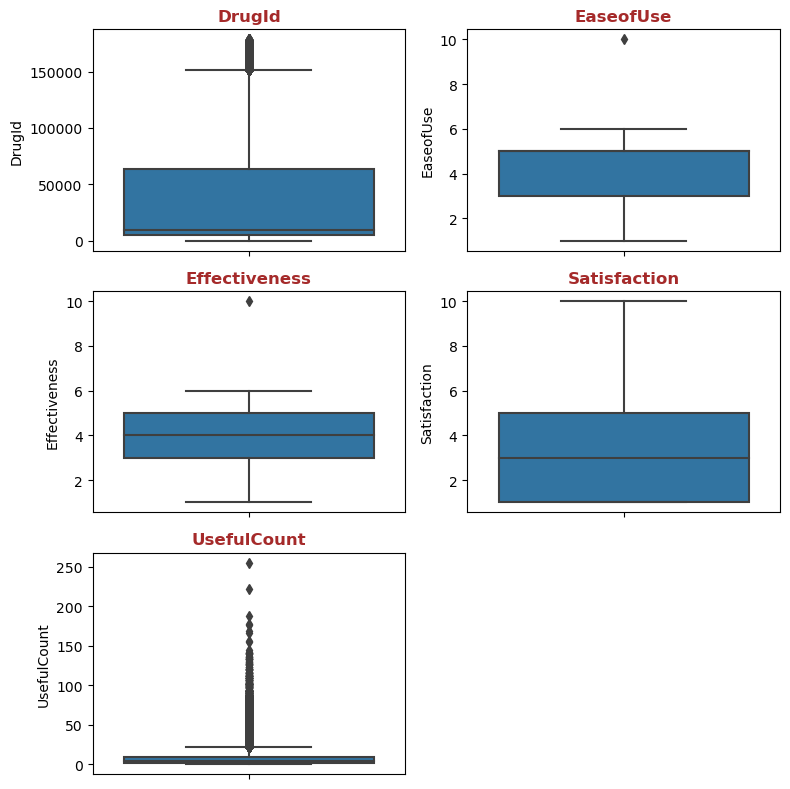

In [37]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number])

# Calculate the number of rows and columns for subplots
num_cols = len(numeric_cols.columns)
num_rows = int(np.ceil(num_cols / 2))

# Create a figure and axis for subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(8, 8))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over each numeric column and create a box plot
for i, column in enumerate(numeric_cols.columns):
    sns.boxplot(y=numeric_cols[column], ax=axs[i])
    axs[i].set_title(column,color='brown', fontweight='bold')

# Hide empty subplots if there are an odd number of plots
if num_cols % 2 != 0:
    axs[-1].axis('off')

# Adjust the layout and spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

## <font color = blue>Feature Engineering:

#### The objective of this project is to build a classification model that classifies the side effects of a particular drug by age, gender and race:
#### Selecting Dataset of a particular drug to build the model:

In [38]:
# Calculate the most effective drug

# Group the data by 'Effectiveness'
grouped_data = data.groupby(['Effectiveness'])

# Get the group with an effectiveness level of 5
group_5 = grouped_data.get_group(5)

# Calculate the frequency of each drug for this group
drug_frequency_group_5 = group_5['Drug'].value_counts()

drug_frequency_group_5

lexapro                             1690
phentermine hcl                     1386
cymbalta                            1369
effexor xr                          1277
hydrocodone-acetaminophen           1230
                                    ... 
imipenem-cilastatin sodium vial        1
aqu aerosol, spray with pump           1
maginex                                1
magic bullet suppository, rectal       1
nomlands lotion                        1
Name: Drug, Length: 5377, dtype: int64

##### Lexapro is the most effective drug because it have more 5 star rating compared to others. 

In [39]:
# Calculate the most Satisfied drug

# Group the data by 'Satisfaction'
grouped_by_satisfaction = data.groupby('Satisfaction')

# Get the group where 'Satisfaction' is equal to 5
satisfaction_5_group = grouped_by_satisfaction.get_group(5)

# Calculate the frequency of each drug within the satisfaction_5_group
drug_frequency_satisfaction_5 = satisfaction_5_group['Drug'].value_counts()

most_satisfied_drug = drug_frequency_satisfaction_5.idxmax()
most_satisfied_drug_frequency = drug_frequency_satisfaction_5.max()

print(f"The most satisfied drug is: {most_satisfied_drug} with a frequency of {most_satisfied_drug_frequency}")

The most satisfied drug is: lexapro with a frequency of 1521


##### Lexapro is the most satisfied  drug because it have more 5 star rating compared to others. 

In [40]:
# Calculate the most Unsatisfied drug

# Group the data by 'Satisfaction'
grouped_by_satisfaction = data.groupby('Satisfaction')

# Get the group where 'Satisfaction' is equal to 1
satisfaction_1_group = grouped_by_satisfaction.get_group(1)

# Calculate the frequency of each drug within the satisfaction_1_group
drug_frequency_satisfaction_1 = satisfaction_1_group['Drug'].value_counts()

# Calculate the most Unsatisfied drug
most_unsatisfied_drug = drug_frequency_satisfaction_1.idxmax()
most_unsatisfied_drug_frequency = drug_frequency_satisfaction_1.max()

print(f"The most unsatisfied drug is: {most_unsatisfied_drug} with a frequency of {most_unsatisfied_drug_frequency}")

The most unsatisfied drug is: lisinopril solution with a frequency of 1518


##### Lisinopril Solution is the most unsatisfied drug because it have more 5 star rating compared to others.

In [41]:
# Calculate the frequency of each drug
drugid_frequency = data['DrugId'].value_counts()

# Select the top drug based on frequency
most_common_drugid = drugid_frequency.idxmax()

# Find the drug associated with the most common DrugId
common_drug = data[data['DrugId'] == most_common_drugid]['Drug'].iloc[0]

# Find the conditions associated with the most common drug
common_drug_conditions = data[data['Drug'] == common_drug]['Condition'].unique()

# Print the most common DrugId, the associated drug, and the conditions
print(f"The most common DrugId is: {most_common_drugid}")
print(f"The drug associated with this DrugId is: {common_drug}")
print(f"The conditions associated with this drug are:")
for condition in common_drug_conditions:
    print(condition)
    
common_drug_frequency = drugid_frequency[most_common_drugid]
print(f"The frequency of the most common drug is: {common_drug_frequency}")

The most common DrugId is: 6873
The drug associated with this DrugId is: lisinopril solution
The conditions associated with this drug are:
High Blood Pressure
Other
Chronic Heart Failure
Migraine Prevention
Kidney Problem caused by Body Tissue Disease-Scleroderma
Prevention of Recurrent Atrial Fibrillation
Kidney Disease from Diabetes
Diastolic Heart Failure
Heart Attack
Failure of the Left Ventricle of the Heart
Nondiabetic Proteinuric Nephropathy
Retinal Changes of Eye in a Patient with Diabetes
The frequency of the most common drug is: 8538


##### The most common DrugId is: 6873
##### The drug associated with this DrugId is: Lisinopril Solution 
##### People are not satisfied with the drug lisinopril solution . But still many people are using that. May be because of its side effects people are not satisfied with that drug.

## Dataset of Lisinopril Solution:

In [42]:
new_data=data.groupby('Drug')

In [43]:
df1=new_data.get_group('lisinopril solution')

In [44]:
df1.head(10)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,SideEffects,UsefulCount
9197,Colin Berger,Hispanic,45-54,High Blood Pressure,2/29/2020,lisinopril solution,6873,5,5,No Script or health Insurance needed to place ...,5,Female,"Dizziness , lightheadedness , tiredness, or ...",14
9203,Gloria Nelson,Hispanic,75 or over,High Blood Pressure,2/8/2020,lisinopril solution,6873,5,4,I have developed a very itch rash on my body f...,4,Female,"Dizziness , lightheadedness , tiredness, or ...",3
9209,Maria Welch,Black,55-64,High Blood Pressure,1/14/2020,lisinopril solution,6873,4,5,"tried alternative medicine Beet root, hibiscus...",4,Male,"Dizziness , lightheadedness , tiredness, or ...",3
9215,Michelle Avila,Black,65-74,High Blood Pressure,10/17/2019,lisinopril solution,6873,5,5,Have been taking 10 mg doses per day for over ...,5,Male,"Dizziness , lightheadedness , tiredness, or ...",6
9221,Aaron Olson,White,55-64,High Blood Pressure,10/13/2019,lisinopril solution,6873,2,4,I don't like that I'm taking this and not know...,2,Male,"Dizziness , lightheadedness , tiredness, or ...",12
9227,Brandy Collins,Black,55-64,High Blood Pressure,8/16/2019,lisinopril solution,6873,3,1,Was on this medicine for about 2 months and ha...,1,Female,"Dizziness , lightheadedness , tiredness, or ...",22
9233,Erin Berg,Hispanic,25-34,High Blood Pressure,6/3/2019,lisinopril solution,6873,5,2,I was placed on a low dose of Lisinopril after...,1,Female,"Dizziness , lightheadedness , tiredness, or ...",37
9239,Karen Johnson,Black,35-44,Other,6/2/2019,lisinopril solution,6873,5,5,No Script or health Insurance needed to place ...,5,Female,"Dizziness , lightheadedness , tiredness, or ...",24
9245,Rachel Benton,White,65-74,High Blood Pressure,5/16/2019,lisinopril solution,6873,5,5,Taken for years and works great,5,Male,"Dizziness , lightheadedness , tiredness, or ...",6
9251,Allen Wells,White,65-74,High Blood Pressure,5/6/2019,lisinopril solution,6873,3,2,I just started taking it,2,Female,"Dizziness , lightheadedness , tiredness, or ...",4


In [45]:
df1.shape

(4269, 14)

In [46]:
df1.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex',
       'SideEffects', 'UsefulCount'],
      dtype='object')

In [47]:
# Iterate over the columns

for column in df1.columns:
    # Get the unique values for the column
    unique_values = df1[column].unique()
    
    # Print the column name and its unique values
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-----------------------")

Column: Name
Unique Values: ['Colin Berger' 'Gloria Nelson' 'Maria Welch' ... 'Sarah Brooks'
 'Daniel Gray' 'Jennifer Park']
-----------------------
Column: Race
Unique Values: ['Hispanic' 'Black' 'White' 'Asian']
-----------------------
Column: Age
Unique Values: ['45-54' '75 or over' '55-64' '65-74' '25-34' '35-44' '13-18' '19-24'
 '0-2' '7-12']
-----------------------
Column: Condition
Unique Values: ['High Blood Pressure' 'Other' 'Chronic Heart Failure'
 'Migraine Prevention'
 'Kidney Problem caused by Body Tissue Disease-Scleroderma'
 'Prevention of Recurrent Atrial Fibrillation'
 'Kidney Disease from Diabetes' 'Diastolic Heart Failure' 'Heart Attack'
 'Failure of the Left Ventricle of the Heart'
 'Nondiabetic Proteinuric Nephropathy'
 'Retinal Changes of Eye in a Patient with Diabetes']
-----------------------
Column: Date
Unique Values: ['2/29/2020' '2/8/2020' '1/14/2020' ... '4/25/2011' '4/24/2011'
 '4/23/2011']
-----------------------
Column: Drug
Unique Values: ['lisinopril s

In [48]:
df1.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,4269.0,4269.000000,4269.000000,4269.000000,4269.000000
mean,6873.0,3.982431,3.369876,2.728274,6.751464
std,0.0,1.290118,1.376854,1.560765,7.459502
min,6873.0,1.000000,1.000000,1.000000,0.000000
25%,6873.0,3.000000,2.000000,1.000000,2.000000
50%,6873.0,4.000000,4.000000,3.000000,5.000000
75%,6873.0,5.000000,5.000000,4.000000,10.000000
max,6873.0,5.000000,5.000000,5.000000,140.000000


In [49]:
df1.describe(include = object).transpose()

,count,unique,top,freq
Name,4269,4152,Joshua Smith,5
Race,4269,4,Black,1090
Age,4269,10,45-54,1246
Condition,4269,12,High Blood Pressure,3834
Date,4269,2116,8/6/2009,10
Drug,4269,1,lisinopril solution,4269
Reviews,4269,3469,,783
Sex,4269,2,Female,2630
SideEffects,4269,1,"Dizziness , lightheadedness , tiredness, or ...",4269


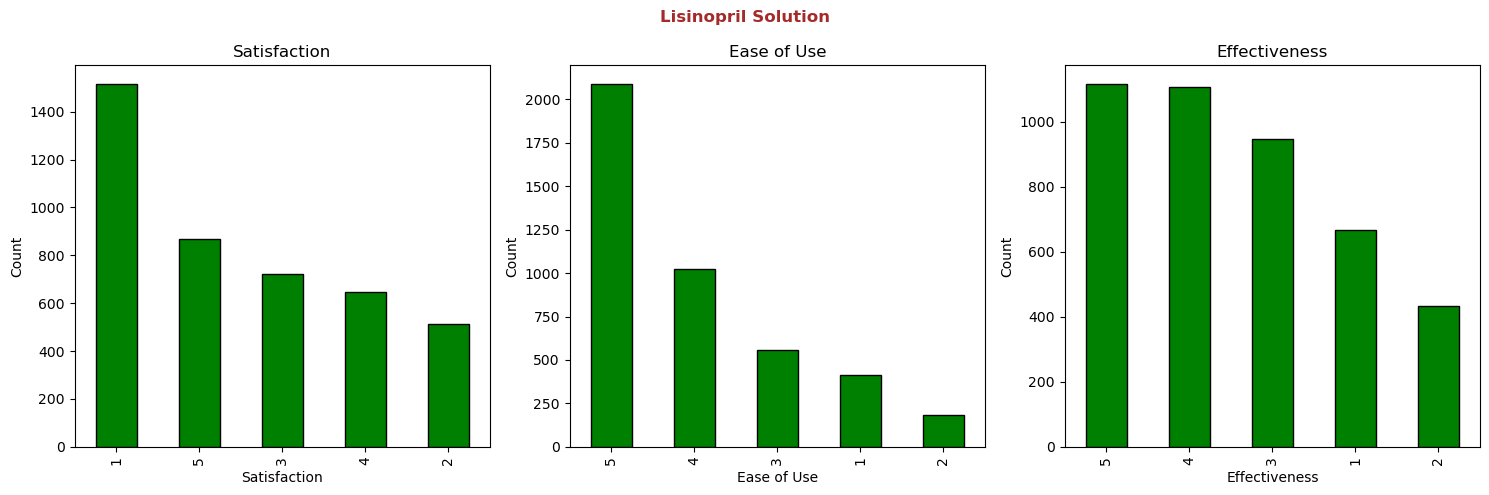

In [50]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Satisfaction
df1['Satisfaction'].value_counts().plot(kind='bar', ax=axes[0], color='green', edgecolor='black')
axes[0].set_title('Satisfaction')
axes[0].set_xlabel('Satisfaction')
axes[0].set_ylabel('Count')

# Plot Ease of Use
df1['EaseofUse'].value_counts().plot(kind='bar', ax=axes[1], color='green', edgecolor='black')
axes[1].set_title('Ease of Use')
axes[1].set_xlabel('Ease of Use')
axes[1].set_ylabel('Count')

# Plot Effectiveness
df1['Effectiveness'].value_counts().plot(kind='bar', ax=axes[2], color='green', edgecolor='black')
axes[2].set_title('Effectiveness')
axes[2].set_xlabel('Effectiveness')
axes[2].set_ylabel('Count')

# Set overall title for the entire figure
fig.suptitle('Lisinopril Solution', color='brown', fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

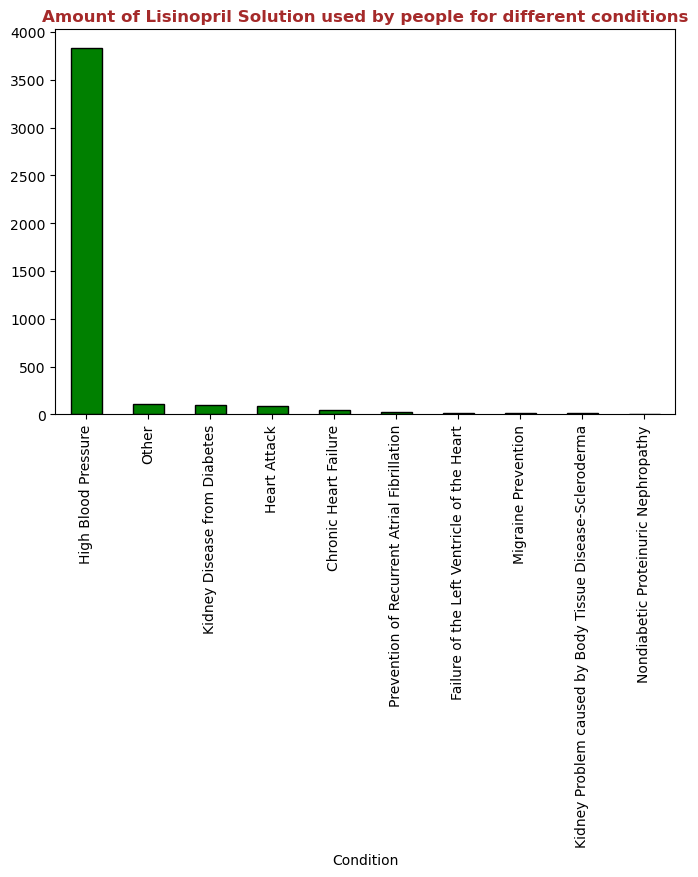

In [51]:
plt.subplots(figsize=(8,5))
df1['Condition'].value_counts().head(10).plot(kind='bar',color='green',edgecolor='black')
plt.title('Amount of Lisinopril Solution used by people for different conditions',color='brown', fontweight='bold')
plt.xlabel('Condition')
plt.show()

##### Lisinopril Solution is mainly used for High Blood Pressure.

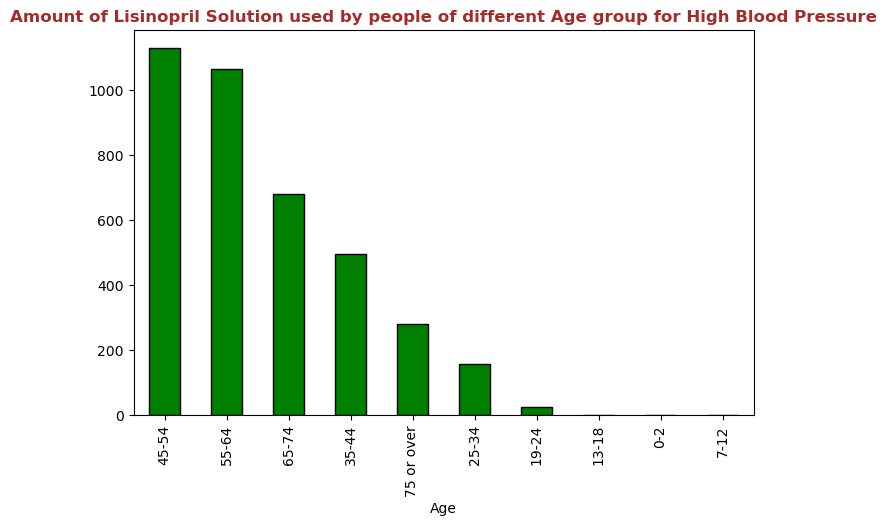

In [52]:
df2=df1.groupby('Condition').get_group('High Blood Pressure')

plt.subplots(figsize=(8,5))
df2['Age'].value_counts().head(20).plot(kind='bar',color='green',edgecolor='black')
plt.title('Amount of Lisinopril Solution used by people of different Age group for High Blood Pressure',color='brown', 
          fontweight='bold')
plt.xlabel('Age')
plt.show()

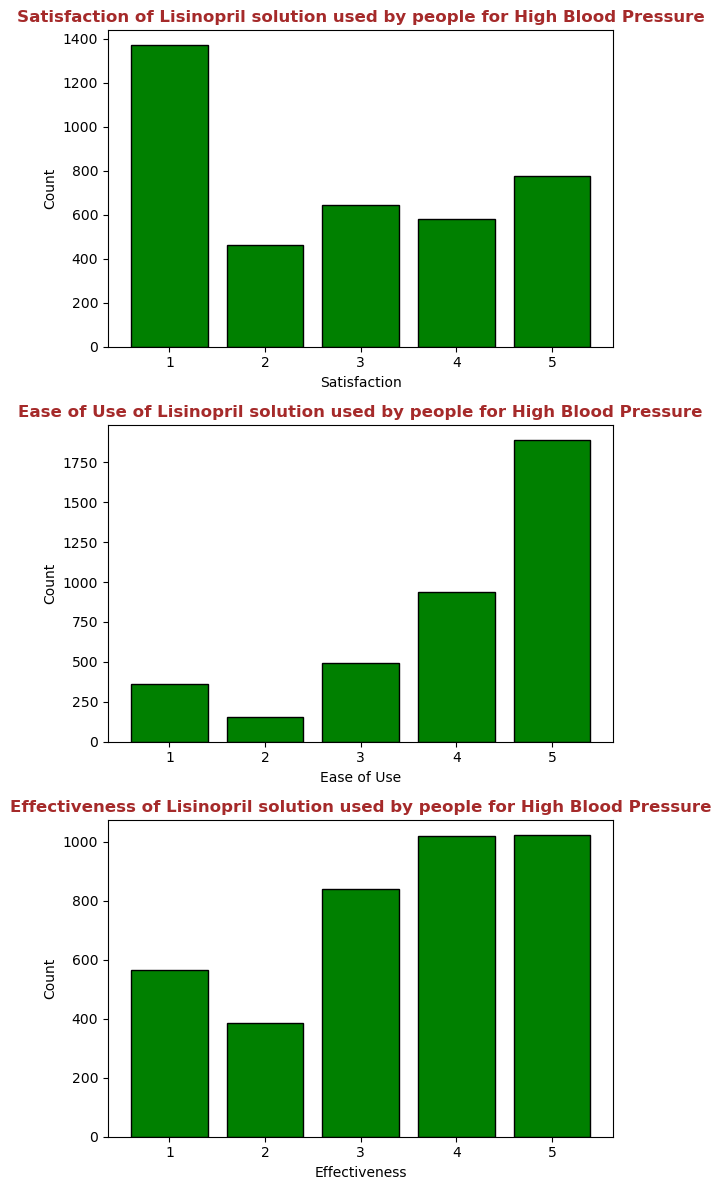

In [53]:
# Define the parameters for plotting
parameters = [('Satisfaction', 'Satisfaction'),
              ('EaseofUse', 'Ease of Use'),
              ('Effectiveness', 'Effectiveness')]

# Create subplots with transposed layout
fig, axes = plt.subplots(3, 1, figsize=(6, 12))

# Plot for each parameter
for i, (parameter, xlabel) in enumerate(parameters):
    values = df2[parameter].value_counts().head(20)
    axes[i].bar(values.index, values.values, color='green',edgecolor='black')
    axes[i].set_title(f'{xlabel} of Lisinopril solution used by people for High Blood Pressure', color='brown',
                      fontweight='bold')
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

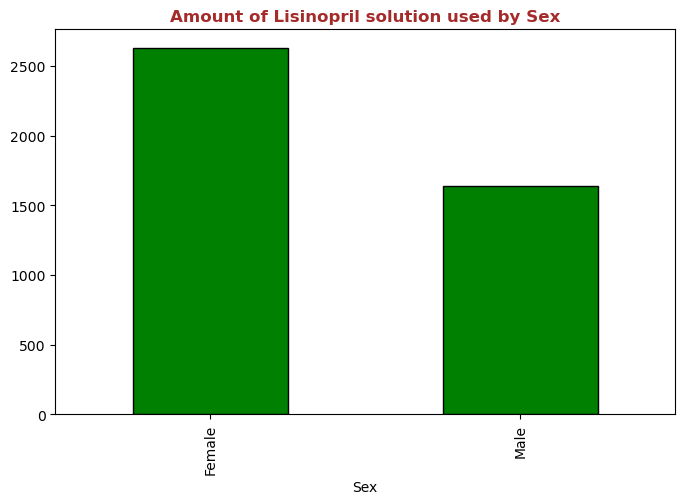

In [54]:
plt.subplots(figsize=(8,5))
df1['Sex'].value_counts().head(10).plot(kind='bar',color='green',edgecolor='black')
plt.title('Amount of Lisinopril solution used by Sex',color='brown',fontweight='bold')
plt.xlabel('Sex')
plt.show()

##### Lisinopril Solution is  more used by Female. 

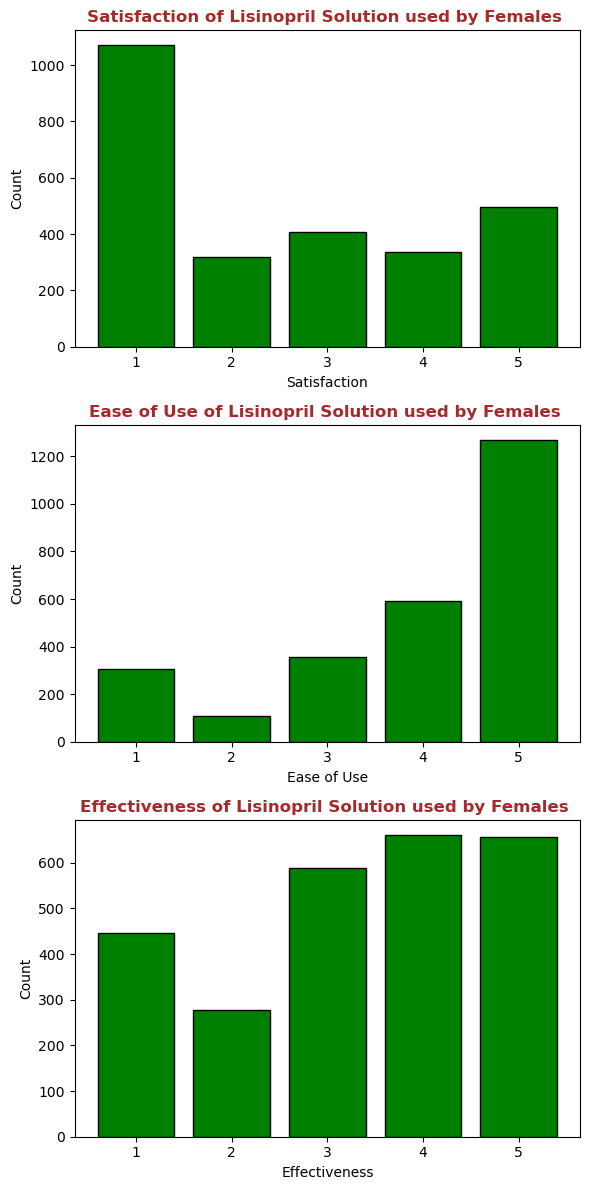

In [55]:
df3=df1.groupby('Sex').get_group('Female')

# Define the parameters for plotting
parameters = [('Satisfaction', 'Satisfaction'),
              ('EaseofUse', 'Ease of Use'),
              ('Effectiveness', 'Effectiveness')]

# Create subplots with transposed layout
fig, axes = plt.subplots(3, 1, figsize=(6, 12))

# Plot for each parameter
for i, (parameter, xlabel) in enumerate(parameters):
    values = df3[parameter].value_counts().head(20)
    axes[i].bar(values.index, values.values, color='green',edgecolor='black')
    axes[i].set_title(f'{xlabel} of Lisinopril Solution used by Females ', color='brown',
                      fontweight='bold')
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

### <font color = blue> Feature Reduction:

In [56]:
df1=df1.drop(['Name','Reviews','DrugId','Date','Drug','SideEffects'],axis=1)

### <font color = blue>Encoding:

In [57]:
df1.dtypes

Race             object
Age              object
Condition        object
EaseofUse         int64
Effectiveness     int64
Satisfaction      int64
Sex              object
UsefulCount       int64
dtype: object

In [58]:
# Performing one-hot encoding

drug_data=df1.copy()

drug_data=pd.get_dummies(df1)

In [59]:
drug_data.head()

,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,Age_13-18,...,Condition_High Blood Pressure,Condition_Kidney Disease from Diabetes,Condition_Kidney Problem caused by Body Tissue Disease-Scleroderma,Condition_Migraine Prevention,Condition_Nondiabetic Proteinuric Nephropathy,Condition_Other,Condition_Prevention of Recurrent Atrial Fibrillation,Condition_Retinal Changes of Eye in a Patient with Diabetes,Sex_Female,Sex_Male
9197,5,5,5,14,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9203,5,4,4,3,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9209,4,5,4,3,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9215,5,5,5,6,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9221,2,4,2,12,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [60]:
drug_data.columns

Index(['EaseofUse', 'Effectiveness', 'Satisfaction', 'UsefulCount',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_White', 'Age_0-2',
       'Age_13-18', 'Age_19-24', 'Age_25-34', 'Age_35-44', 'Age_45-54',
       'Age_55-64', 'Age_65-74', 'Age_7-12', 'Age_75 or over',
       'Condition_Chronic Heart Failure', 'Condition_Diastolic Heart Failure',
       'Condition_Failure of the Left Ventricle of the Heart',
       'Condition_Heart Attack', 'Condition_High Blood Pressure',
       'Condition_Kidney Disease from Diabetes',
       'Condition_Kidney Problem caused by Body Tissue Disease-Scleroderma',
       'Condition_Migraine Prevention',
       'Condition_Nondiabetic Proteinuric Nephropathy', 'Condition_Other',
       'Condition_Prevention of Recurrent Atrial Fibrillation',
       'Condition_Retinal Changes of Eye in a Patient with Diabetes',
       'Sex_Female', 'Sex_Male'],
      dtype='object')

In [61]:
# Check the distribution of the target variable:

drug_data['Effectiveness'].value_counts()

5    1118
4    1107
3     946
1     666
2     432
Name: Effectiveness, dtype: int64

## <font color = blue> Train and Evaluate the models by applying Classification Algorithms:

In [62]:
# Selecting Target(y) column and Feature(x) columns

x = drug_data.drop(['Effectiveness'],axis=1)  #Independent variable
y = drug_data['Effectiveness']  #Dependent variable

In [63]:
# Hold Out Techiniques:

#Split the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)